In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.linear_model import Ridge
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

Our Data from Kaggle:

In [23]:
df_bit_raw = pd.read_csv('BTC-USD.csv')
df_bit_raw['Date'] = pd.to_datetime(df_bit_raw['Date'])

df_bit_raw

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
...,...,...,...,...,...,...,...
3224,2023-07-16,30297.472656,30437.560547,30089.669922,30249.132813,30249.132813,8516564470
3225,2023-07-17,30249.626953,30336.400391,29685.783203,30145.888672,30145.888672,13240156074
3226,2023-07-18,30147.070313,30233.656250,29556.427734,29856.562500,29856.562500,13138897269
3227,2023-07-19,30147.070313,30233.656250,29556.427734,29856.562500,29856.562500,13138897269


S&P 500 Index USA:

https://www.marketwatch.com/investing/index/spx/download-data?startDate=9/17/2014&endDate=7/20/2015

In [24]:
df_sp_raw = pd.read_csv('INDEX_US_S&P US_SPX.csv')
df_sp_raw = df_sp_raw[::-1].reset_index(drop=True)
df_sp_raw['Date'] = pd.to_datetime(df_sp_raw['Date'])

df_sp_raw

,Date,Open,High,Low,Close
0,2014-09-17,1999.30,2010.74,1993.29,2001.57
1,2014-09-18,2003.07,2012.34,2003.07,2011.36
2,2014-09-19,2012.74,2019.26,2006.59,2010.40
3,2014-09-22,2009.08,2009.08,1991.01,1994.29
4,2014-09-23,1992.78,1995.41,1982.77,1982.77
...,...,...,...,...,...
2220,2023-07-14,4514.61,4527.76,4499.56,4505.42
2221,2023-07-17,4508.86,4532.85,4504.90,4522.79
2222,2023-07-18,4521.78,4562.30,4514.59,4554.98
2223,2023-07-19,4563.87,4578.43,4557.48,4565.72


Value of gold USD:

https://www.gold.org/goldhub/data/gold-prices#registration-type=google&just-verified=1

In [25]:
df_gd_raw = pd.read_csv('Gold.csv')
df_gd_raw['Date'] = pd.to_datetime(df_gd_raw['Date'])

df_gd_raw

,Date,USD
0,2014-09-17,1236.0
1,2014-09-18,1220.5
2,2014-09-19,1219.8
3,2014-09-22,1213.5
4,2014-09-23,1222.0
...,...,...
2302,2023-07-14,1953.7
2303,2023-07-17,1949.6
2304,2023-07-18,1975.0
2305,2023-07-19,1975.4


This data set does not have all days of the year, therefore the following will dectect which days are missing, create an index for it, and will replicate the former's day value into it.

In [26]:
j = 0
while j < 3:
    missing_dates = df_bit_raw[~df_bit_raw['Date'].isin(df_sp_raw['Date'])]
    rows_to_add = []
    for date in missing_dates['Date']:
        prev_date = date - pd.DateOffset(days=1)
        prev_values = df_sp_raw.loc[df_sp_raw['Date'] == prev_date, ['Open', 'High', 'Low', 'Close']].values
        if len(prev_values) > 0:
            prev_value1, prev_value2, prev_value3, prev_value4 = prev_values[0]
            new_row = {'Date': date, 'Open': prev_value1, 'High': prev_value2, 'Low': prev_value3, 'Close': prev_value4}
            rows_to_add.append(new_row)
    df_to_append = pd.DataFrame(rows_to_add)
    df_sp_raw = pd.concat([df_sp_raw, df_to_append], ignore_index=True)
    df_sp_raw['Date'] = pd.to_datetime(df_sp_raw['Date'])
    df_sp_raw = df_sp_raw.sort_values('Date')
    df_sp_raw = df_sp_raw.reset_index(drop=True)
    j += 1
df_sp_raw

,Date,Open,High,Low,Close
0,2014-09-17,1999.30,2010.74,1993.29,2001.57
1,2014-09-18,2003.07,2012.34,2003.07,2011.36
2,2014-09-19,2012.74,2019.26,2006.59,2010.40
3,2014-09-20,2012.74,2019.26,2006.59,2010.40
4,2014-09-21,2012.74,2019.26,2006.59,2010.40
...,...,...,...,...,...
3224,2023-07-16,4514.61,4527.76,4499.56,4505.42
3225,2023-07-17,4508.86,4532.85,4504.90,4522.79
3226,2023-07-18,4521.78,4562.30,4514.59,4554.98
3227,2023-07-19,4563.87,4578.43,4557.48,4565.72


In [27]:
j = 0
while j < 3:
    missing_dates = df_bit_raw[~df_bit_raw['Date'].isin(df_gd_raw['Date'])]
    rows_to_add = []
    for date in missing_dates['Date']:
        prev_date = date - pd.DateOffset(days=1)
        prev_values = df_gd_raw.loc[df_gd_raw['Date'] == prev_date, 'USD'].values
        if len(prev_values) > 0:
            prev_value1 = prev_values[0]
            new_row = {'Date': date, 'USD': prev_value1}
            rows_to_add.append(new_row)
    df_to_append = pd.DataFrame(rows_to_add)
    df_gd_raw = pd.concat([df_gd_raw, df_to_append], ignore_index=True)
    df_gd_raw['Date'] = pd.to_datetime(df_gd_raw['Date'])
    df_gd_raw = df_gd_raw.sort_values('Date')
    df_gd_raw = df_gd_raw.reset_index(drop=True)
    j += 1
df_gd_raw

,Date,USD
0,2014-09-17,1236.0
1,2014-09-18,1220.5
2,2014-09-19,1219.8
3,2014-09-20,1219.8
4,2014-09-21,1219.8
...,...,...
3224,2023-07-16,1953.7
3225,2023-07-17,1949.6
3226,2023-07-18,1975.0
3227,2023-07-19,1975.4


Makes the data correspond with the next's day Bitcoin value.

In [28]:
df_bit_raw['Volume'] = df_bit_raw['Volume'].shift(+1)
df_bit_raw = df_bit_raw.drop(df_bit_raw.index[0])
df_bit_raw = df_bit_raw.reset_index(drop=True)
df_gd_raw = df_gd_raw.drop(df_gd_raw.index[-1])
df_sp_raw = df_sp_raw.drop(df_sp_raw.index[-1])


Now we create a new Data Frame with the data that will be used.

In [29]:
df_sp_raw = df_sp_raw.rename(columns={'Close': 'S&P 500 (USD)'})
df_bit_raw = df_bit_raw.rename(columns={'Adj Close': 'Bitcoin (USD)', 'Volume' : 'Volume Bitcoin'})
df_gd_raw = df_gd_raw.rename(columns={'USD': 'Gold (USD)'})

df = pd.concat([df_sp_raw['Date'], df_bit_raw['Bitcoin (USD)'], df_bit_raw['Volume Bitcoin'], df_sp_raw['S&P 500 (USD)'], df_gd_raw['Gold (USD)']], axis=1)

df['Date'] = (df['Date'] - pd.to_datetime('2014-09-17')).dt.days

df

,Date,Bitcoin (USD),Volume Bitcoin,S&P 500 (USD),Gold (USD)
0,0,424.440002,2.105680e+07,2001.57,1236.0
1,1,394.795990,3.448320e+07,2011.36,1220.5
2,2,408.903992,3.791970e+07,2010.40,1219.8
3,3,398.821014,3.686360e+07,2010.40,1219.8
4,4,402.152008,2.658010e+07,2010.40,1219.8
...,...,...,...,...,...
3223,3223,30249.132813,8.011668e+09,4505.42,1953.7
3224,3224,30145.888672,8.516564e+09,4505.42,1953.7
3225,3225,29856.562500,1.324016e+10,4522.79,1949.6
3226,3226,29856.562500,1.313890e+10,4554.98,1975.0


The following measure the correlation between the data. 1 means perfect correlation.

In [30]:
df.corr('pearson')

,Date,Bitcoin (USD),Volume Bitcoin,S&P 500 (USD),Gold (USD)
Date,1.000000,0.749139,0.680149,0.937453,0.902702
Bitcoin (USD),0.749139,1.000000,0.702050,0.896130,0.766396
Volume Bitcoin,0.680149,0.702050,1.000000,0.691358,0.710430
S&P 500 (USD),0.937453,0.896130,0.691358,1.000000,0.899619
Gold (USD),0.902702,0.766396,0.710430,0.899619,1.000000


Plot of correlation:

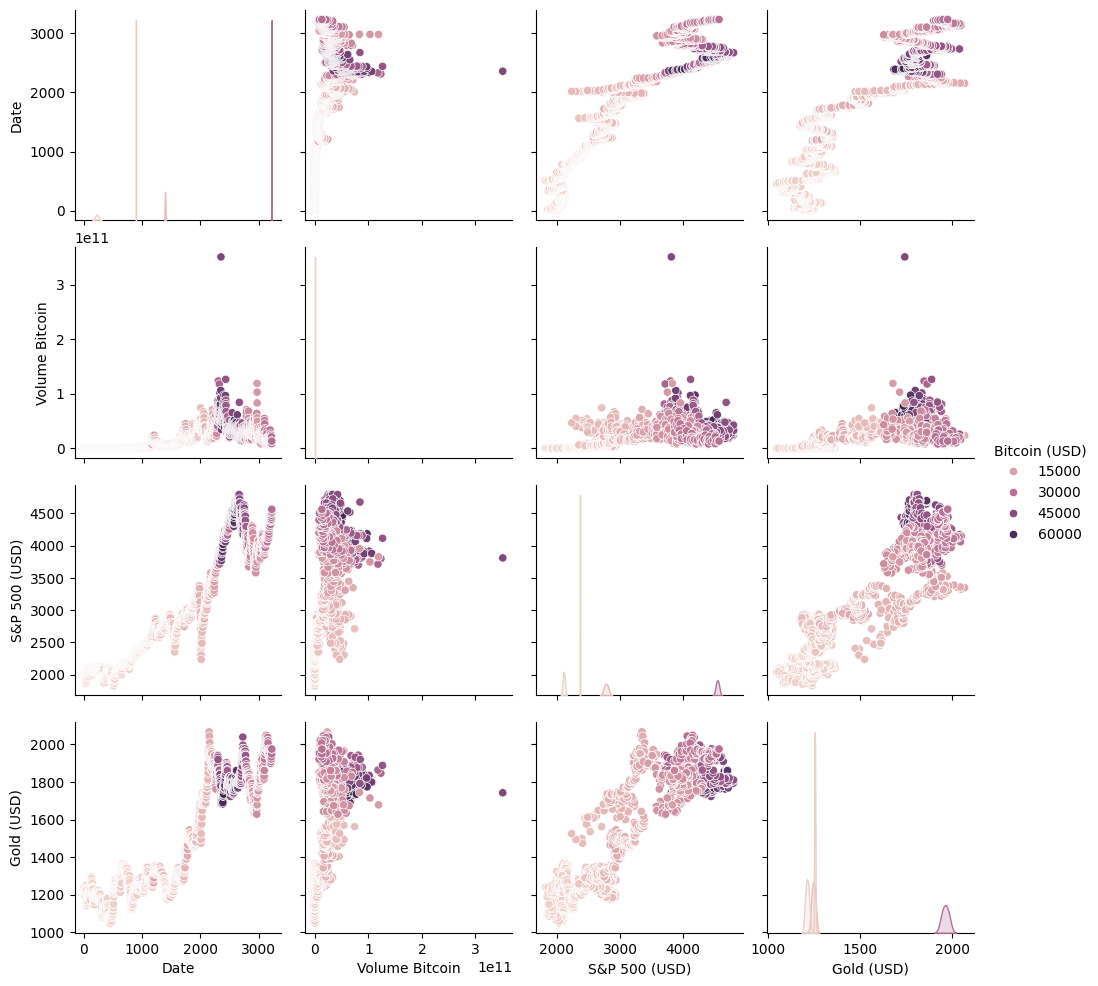

In [31]:
sns.pairplot(df, hue='Bitcoin (USD)')
plt.show()

Now, the linear regression will be built:

In [32]:
train, test = train_test_split(df, test_size=0.4, shuffle=True)

X_train = train.loc[:, train.columns != 'Bitcoin (USD)']
Y_train = train.loc[:,['Bitcoin (USD)']]

X_test = test.loc[:, test.columns != 'Bitcoin (USD)']
Y_test = test.loc[:,['Bitcoin (USD)']]

alphas = np.logspace(-3, 3, 100)
param_grid = {'alpha': alphas}
grid_search = GridSearchCV(Ridge(), param_grid, cv=5)
grid_search.fit(X_train, Y_train)
best_alpha = grid_search.best_params_['alpha']
print(f'Best Alpha: {best_alpha}')
ridge_model = Ridge(alpha=best_alpha)
ridge_model.fit(X_train, Y_train)

Y_pred = ridge_model.predict(X_test)

print(f'Mean Absolute Percentage Error: {mean_absolute_percentage_error(Y_test, Y_pred):.3f}%')
print(f'Mean Absolute Error: {mean_absolute_error(Y_test, Y_pred):.3f}')
print(f'R2 Score: {r2_score(Y_test, Y_pred):.3f}')

C:\Users\davis\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=3.09977e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\davis\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=3.00034e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\davis\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=3.12478e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\davis\AppD

Best Alpha: 1000.0
Mean Absolute Percentage Error: 2.269%
Mean Absolute Error: 3752.801
R2 Score: 0.885


C:\Users\davis\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=3.00038e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\davis\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=3.12483e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\davis\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=3.05825e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\davis\AppD

Prediction example:

In [33]:
X_new = pd.read_csv('Prediction.csv')
X_new['Date'] = pd.to_datetime(X_new['Date'])
X_new['Date'] = (X_new['Date'] - pd.to_datetime('2014-09-17')).dt.days

Y_pred = ridge_model.predict(X_new)
sY_pred = np.round(Y_pred, 2).item()
fY_pred = float(sY_pred)
print("Bitcoin value tomorrow:")
print('US$ '+ str(fY_pred))

Bitcoin value tomorrow:
US$ 25627.04


Prediction data:

In [34]:
df_sp = pd.read_csv('S&P test.csv')
df_sp['Date'] = pd.to_datetime(df_sp['Date'])

df_sp

,Date,S&P 500 (USD)
0,2023-11-10,4415.24
1,2023-11-09,4347.35
2,2023-11-08,4382.78
3,2023-11-07,4378.38
4,2023-11-06,4365.98
...,...,...
75,2023-07-27,4537.41
76,2023-07-26,4566.75
77,2023-07-25,4567.46
78,2023-07-24,4554.64


In [35]:
df_bit = pd.read_csv('Bitcoin test.csv')
df_bit['Date'] = pd.to_datetime(df_bit['Date'])

df_bit

,Date,Price,Vol.
0,2023-11-10,37303.0,59560
1,2023-11-09,36700.5,115560
2,2023-11-08,35636.9,46330
3,2023-11-07,35426.1,53490
4,2023-11-06,35042.0,29810
...,...,...,...
108,2023-07-25,29228.6,29050
109,2023-07-24,29178.1,55730
110,2023-07-23,30085.9,23320
111,2023-07-22,29788.9,18470


In [36]:
df_gd = pd.read_csv('Gold test.csv')
df_gd['Date'] = pd.to_datetime(df_gd['Date'])

df_gd

,Date,Gold (USD)
0,2023-07-21,1960.6
1,2023-07-24,1960.0
2,2023-07-25,1958.7
3,2023-07-26,1966.3
4,2023-07-27,1945.4
...,...,...
76,2023-11-06,1984.6
77,2023-11-07,1960.7
78,2023-11-08,1959.4
79,2023-11-09,1957.5


In [37]:
j = 0
while j < 3:
    missing_dates = df_bit[~df_bit['Date'].isin(df_sp['Date'])]
    rows_to_add = []
    for date in missing_dates['Date']:
        prev_date = date - pd.DateOffset(days=1)
        prev_values = df_sp.loc[df_sp['Date'] == prev_date, 'S&P 500 (USD)'].values
        if len(prev_values) > 0:
            prev_value1 = prev_values.flatten()[0]
            new_row = {'Date': date, 'S&P 500 (USD)': prev_value1}
            rows_to_add.append(new_row)
    df_to_append = pd.DataFrame(rows_to_add)
    df_sp = pd.concat([df_sp, df_to_append], ignore_index=True)
    df_sp['Date'] = pd.to_datetime(df_sp['Date'])
    df_sp = df_sp.sort_values('Date')
    df_sp = df_sp.reset_index(drop=True)
    j += 1
df_sp

,Date,S&P 500 (USD)
0,2023-07-21,4536.34
1,2023-07-22,4536.34
2,2023-07-23,4536.34
3,2023-07-24,4554.64
4,2023-07-25,4567.46
...,...,...
108,2023-11-06,4365.98
109,2023-11-07,4378.38
110,2023-11-08,4382.78
111,2023-11-09,4347.35


In [38]:
j = 0
while j < 3:
    missing_dates = df_bit[~df_bit['Date'].isin(df_gd['Date'])]
    rows_to_add = []
    for date in missing_dates['Date']:
        prev_date = date - pd.DateOffset(days=1)
        prev_values = df_gd.loc[df_gd['Date'] == prev_date, 'Gold (USD)'].values
        if len(prev_values) > 0:
            prev_value1 = prev_values.flatten()[0]
            new_row = {'Date': date, 'Gold (USD)': prev_value1}
            rows_to_add.append(new_row)
    df_to_append = pd.DataFrame(rows_to_add)
    df_gd = pd.concat([df_gd, df_to_append], ignore_index=True)
    df_gd['Date'] = pd.to_datetime(df_gd['Date'])
    df_gd = df_gd.sort_values('Date')
    df_gd = df_gd.reset_index(drop=True)
    j += 1
df_gd

,Date,Gold (USD)
0,2023-07-21,1960.6
1,2023-07-22,1960.6
2,2023-07-23,1960.6
3,2023-07-24,1960.0
4,2023-07-25,1958.7
...,...,...
108,2023-11-06,1984.6
109,2023-11-07,1960.7
110,2023-11-08,1959.4
111,2023-11-09,1957.5


Test DataFrame:

In [39]:
df_bit['Vol.'] = df_bit['Vol.'].shift(+1)
df_bit = df_bit.drop(df_bit.index[0])
df_bit = df_bit.reset_index(drop=True)
df_gd = df_gd.drop(df_gd.index[-1])
df_sp = df_sp.drop(df_sp.index[-1])

df_bit = df_bit.rename(columns={'Price': 'Bitcoin (USD)', 'Vol.' : 'Volume Bitcoin'})

df_test = pd.concat([df_gd['Date'], df_bit['Volume Bitcoin'], df_sp['S&P 500 (USD)'], df_gd['Gold (USD)']], axis=1)

df_test['Date'] = (df_test['Date'] - pd.to_datetime('2014-09-17')).dt.days

df_test

,Date,Volume Bitcoin,S&P 500 (USD),Gold (USD)
0,3229,59560.0,4536.34,1960.6
1,3230,115560.0,4536.34,1960.6
2,3231,46330.0,4536.34,1960.6
3,3232,53490.0,4554.64,1960.0
4,3233,29810.0,4567.46,1958.7
...,...,...,...,...
107,3336,44330.0,4358.34,1994.5
108,3337,29050.0,4365.98,1984.6
109,3338,55730.0,4378.38,1960.7
110,3339,23320.0,4382.78,1959.4


Prediction:

In [40]:
Y_pred = ridge_model.predict(df_test)
Y_pred = pd.DataFrame(Y_pred)
Y_pred = Y_pred.rename(columns={0: 'Predicted (USD)'})
Y_pred

,Predicted (USD)
0,30246.328559
1,30232.696767
2,30219.037547
3,30745.288414
4,31114.038889
...,...
107,23401.656903
108,23659.252672
109,24123.061812
110,24244.712022


In [41]:
Comp = pd.DataFrame()
sample = pd.DataFrame()

Comp['Date'] = df_gd['Date']
Comp['Predicted (USD)'] = Y_pred['Predicted (USD)']
Comp['Bitcoin (USD)'] = df_bit['Bitcoin (USD)'].iloc[::-1].reset_index(drop=True)

Comp

,Date,Predicted (USD),Bitcoin (USD)
0,2023-07-21,30246.328559,29903.1
1,2023-07-22,30232.696767,29788.9
2,2023-07-23,30219.037547,30085.9
3,2023-07-24,30745.288414,29178.1
4,2023-07-25,31114.038889,29228.6
...,...,...,...
107,2023-11-05,23401.656903,35019.4
108,2023-11-06,23659.252672,35042.0
109,2023-11-07,24123.061812,35426.1
110,2023-11-08,24244.712022,35636.9


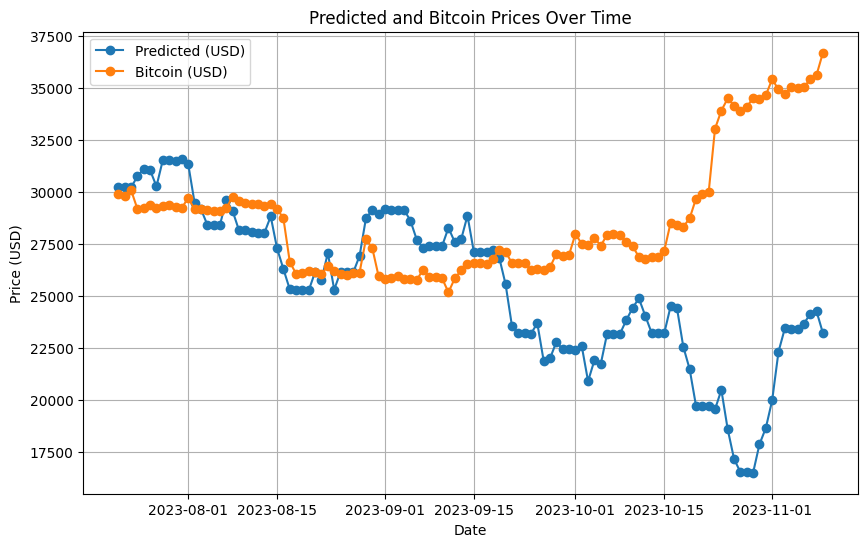

In [42]:
Comp['Date'] = pd.to_datetime(Comp['Date'])
plt.figure(figsize=(10, 6))

plt.plot(Comp['Date'], Comp['Predicted (USD)'], label='Predicted (USD)', marker='o')
plt.plot(Comp['Date'], Comp['Bitcoin (USD)'], label='Bitcoin (USD)', marker='o')

plt.title('Predicted and Bitcoin Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()